In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
%matplotlib inline
from matplotlib.offsetbox import AnchoredText
from DSOhelper import addsubfiglabels,get_oscilloscope_data,getvoltage,plot_scope_data,subplot_scope_data
from statsmodels.tsa import stattools #conda install -c conda-forge statsmodels
from scipy import signal
from scipy.signal import find_peaks
from time import time as t

## determine the mean height of peaks vs overvoltage

In [2]:
datafolder = "vary_led_1562/"
files = sorted([f for f in os.listdir(datafolder) if f[:4]=="temp"])
file=files[0]
len(files),files[::len(files)-1]

(10000, ['temp0000000.CSV', 'temp0009999.CSV'])

In [3]:
dataseq,headers=get_oscilloscope_data(f"{datafolder}{file}")

In [4]:
headers

{1: {'Memory Length': 10000.0,
  'IntpDistance': 0.0,
  'Trigger Address': 5159.0,
  'Trigger Level': 0.3,
  'Source': 'CH1',
  'Vertical Units': 'V',
  'Vertical Units Div': 0.0,
  'Vertical Units Extend Div': 16.0,
  'Label': '',
  'Probe Type': 0.0,
  'Probe Ratio': 10.0,
  'Vertical Scale': 0.5,
  'Vertical Position': -1.78,
  'Horizontal Units': 'S',
  'Horizontal Scale': 2e-05,
  'Horizontal Position': -3.2e-06,
  'Horizontal Mode': 'Main',
  'SincET Mode': 'Real Time',
  'Sampling Period': 2e-08,
  'Horizontal Old Scale': 2e-05,
  'Horizontal Old Position': -3.2e-06,
  'Firmware': 'V1.23',
  'Mode': 'Fast'},
 2: {'Memory Length': 10000.0,
  'IntpDistance': 0.0,
  'Trigger Address': 5159.0,
  'Trigger Level': 0.3,
  'Source': 'CH2',
  'Vertical Units': 'V',
  'Vertical Units Div': 0.0,
  'Vertical Units Extend Div': 16.0,
  'Label': '',
  'Probe Type': 0.0,
  'Probe Ratio': 1.0,
  'Vertical Scale': 0.2,
  'Vertical Position': -2.24,
  'Horizontal Units': 'S',
  'Horizontal Scale'

In [5]:
headers[1]["Sampling Period"],headers[1]["Vertical Scale"]

(2e-08, 0.5)

### plotting a subset of data for sanity check

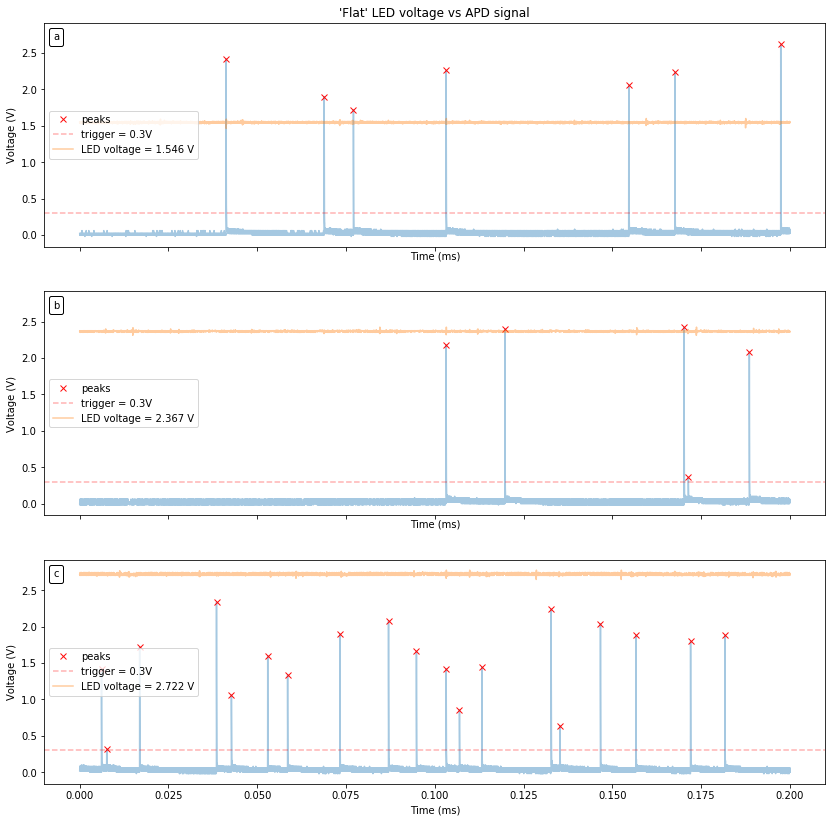

CPU times: user 676 ms, sys: 8.12 ms, total: 684 ms
Wall time: 703 ms


In [6]:
%%time
zeroOverVoltage = 139.3
CH=1
fig,axx = plt.subplots(3,1,figsize=(14,14),sharey=True,sharex=True)
for i,file,ax in zip(range(len(axx)),['temp0000205.CSV','temp0005505.CSV','temp0009505.CSV'],axx):
    dataseq,headers=get_oscilloscope_data(f"{datafolder}{file}")
    xscale=1e3
    subplot_scope_data(dataseq,headers,ax,alpha=0.4,xscale=xscale) 
    peak_x , peak_heights = find_peaks(dataseq[CH],height=15)
    ax.plot(peak_x*headers[CH]["Sampling Period"]*xscale,getvoltage(peak_heights["peak_heights"],headers[CH]),"x",c="r",alpha=0.96,label="peaks")
    ax.axhline(headers[CH]["Trigger Level"],c="r",ls="--",alpha=0.3,label=f"trigger = {headers[CH]['Trigger Level']}V")
    subplot_scope_data(dataseq,headers,ax,CH=2,alpha=0.4,xscale=xscale,label=f"LED voltage = {np.mean(getvoltage(dataseq[2] ,headers[2])):.3f} V")
    ax.legend(loc="center left")
    ax.set_ylabel("Voltage (V)")
    ax.set_xlabel("Time (ms)")
    if i ==0:
        ax.set_title("'Flat' LED voltage vs APD signal")
addsubfiglabels(axx)
plt.show()
#plt.savefig("results08_01_flatLEDvoltage.png")

In [7]:
%%time
average_led_voltage=[]
average_peak_counts = []
for file in files[::]:
    dataseq,headers=get_oscilloscope_data(f"{datafolder}{file}")
    average_led_voltage.append(np.mean(getvoltage(dataseq[2],headers[2])))
    peak_x , peak_heights = find_peaks(dataseq[1],height=15)
    average_peak_counts.append(len(peak_x))

CPU times: user 1min 58s, sys: 1.9 s, total: 1min 59s
Wall time: 2min


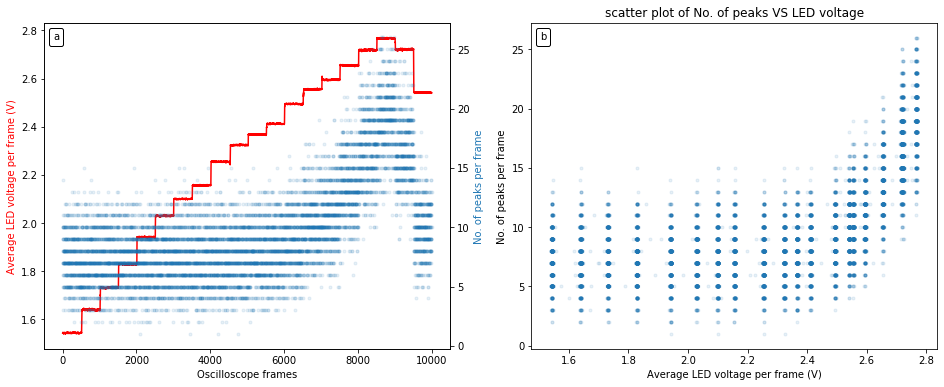

CPU times: user 458 ms, sys: 8.04 ms, total: 466 ms
Wall time: 465 ms


In [8]:
%%time
fig,axx = plt.subplots(1,2,figsize=(16,6))
ax=axx[0]
ax.plot(average_led_voltage,color="red")
##ax.set_title("LED voltage")
ax.set_ylabel("Average LED voltage per frame (V)",color="red")
ax.set_xlabel("Oscilloscope frames")
ax=axx[0].twinx()
ax.plot(average_peak_counts,".",alpha=0.1)
#ax.set_title("counts per frame")
ax.set_ylabel("No. of peaks per frame",color="tab:blue")

ax=axx[1]
ax.scatter(average_led_voltage,average_peak_counts,marker=".",alpha=0.1)
ax.set_xlabel("Average LED voltage per frame (V)")
ax.set_ylabel("No. of peaks per frame")
ax.set_title("scatter plot of No. of peaks VS LED voltage")
addsubfiglabels(axx)
plt.show()#plt.savefig("results08_02_overviewplot_with_transients.png")

In [10]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [11]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

# histograms between intervals

NameError: name 'apd_data' is not defined

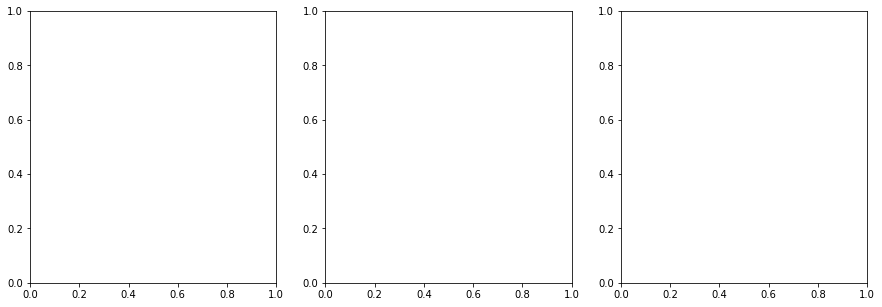

In [12]:
i=0
fig,axx=plt.subplots(1,3,figsize=(15,5))
axx[0].plot(np.arange(len(apd_data[i]))*SamplingPeriod*1e6,apd_data[i])
axx[0].scatter(apd_peaks[i][0]*SamplingPeriod*1e6,apd_peaks[i][1],marker="x",color="r")
axx[0].set_title("peaks detected with scipy.find_peaks")
axx[0].set_xlabel("time (microseconds)")
axx[1].hist(dark_peak_heights,bins=np.arange(min(dark_peak_heights),max(dark_peak_heights)+1));
axx[1].set_title("distribution of peak heights")
axx[1].set_ylabel("Frequency")
axx[2].hist(np.asarray(dark_peak_times)*SamplingPeriod*1e6);
axx[2].set_title("distribution of peak timings")
axx[2].set_xlabel("time (microseconds)")
axx[2].set_ylabel("Frequency")
addsubfiglabels(axx)
plt.show()